# Unique Plate Stability - Data Analysis

## Setup

### Confidentiality

**All information in this document is strictly confidiental**
**Copyright (C) 2019 HES-SO Valais-Wallis - All Rights Reserved**

### Import sub-modules

In [1]:
# Import required sub-modules

# python
import sys
import os
import enum
import datetime

# iPython
import IPython
from IPython.display import display
from IPython.display import Image

# pandas
import pandas as pd

# numpy
import numpy as np

# plotly
import plotly as ply
import plotly.figure_factory as ff
ply.offline.init_notebook_mode(connected=True)
import plotly.io as pio

# watermark
import watermark
%load_ext watermark
%watermark -a "Silvan Zahno" -d -v -iv -m -h

pandas    0.24.2
plotly    3.8.1
watermark 1.8.1
numpy     1.16.2
IPython   7.4.0
Silvan Zahno 2019-07-01 

CPython 3.7.3
IPython 7.4.0

compiler   : MSC v.1915 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 142 Stepping 10, GenuineIntel
CPU cores  : 8
interpreter: 64bit
host name  : WE6996


### Configurations

In [35]:
# Setup local input directories
inputDir = "input/"

if (os.path.exists(inputDir)) is False:
    os.makedirs(inputDir)
if (os.path.isdir(inputDir)) is False:
    raise NotADirectoryError("{} is not a directory".format(inputDir))

In [36]:
# Setup local input directories
outputDir = "output/"

if (os.path.exists(outputDir)) is False:
    os.makedirs(outputDir)
if (os.path.isdir(outputDir)) is False:
    raise NotADirectoryError("{} is not a directory".format(outputDir))

In [37]:
# Graph output Options
class GraphOutputOption(enum.Enum):
    none = 'none'                     # Do not generate any plots
    inline = 'inline'                 # Generate inline plots only
    htmlFile = 'htmlFile'             # Generate plots in external HTML files
    both = 'both'                     # Generate plots both inline and in external html files
    
class GraphInteractionOption(enum.Enum):
    static = 'static'                 # Generate static inline plots (as images)
    interactive = 'interactive'       # Generate interactive inline plots

notebookGraphingInteraction = GraphInteractionOption('static')
notebookGraphingOutputs = GraphOutputOption('both')

staticImageSize = {'width':1000, 'height':500, 'scale':1}

GraphAutoOpenHTML = False              # Auto open external HTML files [True/False]

In [38]:
# Pandas output options
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)

### Common functions

In [39]:
# Plot figures
def plot_figure(graphFilename, fig, overrideNotebookGraphingInteraction=None):
    """Creates the graph plots depenmding on the choosen option

    Args:
        graphFilename: Filename of the output html-file in case of Option htmlfile
        fig: ply.graph_objs.Figure(data=traces, layout=mylayout)
        overrideNotebookGraphingInteraction: overrides graphic output for this figure
    Returns:
        None
    Raises:
        None

    """
    if (notebookGraphingOutputs == GraphOutputOption('htmlFile')) or (notebookGraphingOutputs == GraphOutputOption('both')):
        ply.offline.plot(fig, filename=graphFilename, auto_open=GraphAutoOpenHTML)
    if (notebookGraphingOutputs == GraphOutputOption('inline')) or (notebookGraphingOutputs == GraphOutputOption('both')):
        choice = None
        if overrideNotebookGraphingInteraction == None:
            if notebookGraphingInteraction == GraphInteractionOption('static'):
                choice = 'static'
            elif notebookGraphingInteraction == GraphInteractionOption('interactive'):
                choice = 'interactive'
        elif overrideNotebookGraphingInteraction == GraphInteractionOption('static'):
            choice = 'static'
        elif overrideNotebookGraphingInteraction == GraphInteractionOption('interactive'):
            choice = 'interactive'
        else:
            choice = 'static'
            
        if choice == 'static':
            plot_img = pio.to_image(fig, format='png', width=staticImageSize['width'], height=staticImageSize['height'], scale=staticImageSize['scale'])
            display(Image(plot_img))
        else:
            ply.offline.iplot(fig)
            

## Data Import

We received the following data

In [40]:
dirlist = os.listdir(inputDir)
print("Files from directory ", inputDir)
for file in dirlist:
  print("  * ",file)


Files from directory  input/
  *  .ipynb_checkpoints
  *  Data process USP v1_1.xlsx
  *  Data process USP v1_2.xlsx
  *  ExportArseneFiltreFinal20190301 v1_2.csv
  *  ExportArseneFiltreFinal20190301 v1_2_1.csv
  *  ExportArseneFiltreFinal20190301.xlsx


### CSV to pandas DF

In [65]:
# Import CSV files into a pandas dataframe
uspExcelExportFileName = 'ExportArseneFiltreFinal20190301 v1_2_1.csv'
uspExcelExportFilePath = inputDir + uspExcelExportFileName
rawUspDf = pd.read_csv(uspExcelExportFilePath, sep=';')

rawUspDf.head()

,SK_LOT,SK_TRACE,OF,BARRE,PLATEAU,LOT,ALLIAGE_INTERNE,ETAT,EPAISSEUR_FINALE,SOUSFAMILLE,FOUR_COULEE,COMPO_SI,COMPO_FE,COMPO_CU,COMPO_MN,COMPO_MG,COMPO_CR,COMPO_NI,COMPO_ZN,COMPO_TI,COMPO_ZR,PRECHAUFFAGE_NUMERO_FOUR,PRECHAUFFAGE_POSITION_FOUR,PRECHAUFFAGE_T_C_AIR_MAXI,TR_DATE_POTENCE,...,TRAC_SENS_TRACTION,TRAC_TXPREML,TRAC_TXPREMT,TRAC_TXDERNL,TRAC_TXDERNT,TRAC_PLNTRANS,TRAC_PLNLONG,TRAC_PLNTRANSTETE,TRAC_PLNTRANSMILIEU,TRAC_PLNTRANSPIED,TRAC_EPMINL,TRAC_EPMINT,TRAC_EPMAXL,TRAC_EPMAXT,REVENU_MACHINE,REVENU_DATE_DEBUT,REVENU_NOCHARGE,LABO_RM,LABO_RP02,LABO_ALGMT,RASPTAB_SK_TEMPS,RASPTAB_ECHANTILLON,RASPTAB_TIL_VAL,RASPTAB_TIT_VAL,RASPTAB_VAL_MAX_TIL_TIT
0,1208407,141800,6278466,5313129152,2494272415,U4272401,7213,T651,20.50,31,HG_TP09,0.09,0.17,1.54,0.048,2.29,0.18,0.005,5.9,0.026,0.023,F13,5,296.3,17.02.2016 04:03,...,L,0.0,0,0.0,0,0.0,0.0,0.7,0.7,1.9,20.52,0,20.63,0,FAIR25,20160226020754,20165102.0,576.2,514.3,13.4,20160308,U4272401-J,508,78,1100
1,1208408,141800,6278466,5313129152,2494272415,U4272402,7213,T651,20.50,31,HG_TP09,0.09,0.17,1.54,0.048,2.29,0.18,0.005,5.9,0.026,0.023,F13,5,296.3,17.02.2016 04:03,...,L,0.0,0,0.0,0,0.0,0.0,0.7,0.7,0.7,20.53,0,20.60,0,FAIR25,20160226020754,20165102.0,577.6,515.7,12.9,20160308,U4272402-J,589,159,1100
2,1208409,141800,6278466,5313129152,2494272415,U4272403,7213,T651,20.50,31,HG_TP09,0.09,0.17,1.54,0.048,2.29,0.18,0.005,5.9,0.026,0.023,F13,5,296.3,17.02.2016 04:03,...,L,0.0,0,0.0,0,0.0,0.0,0.7,0.7,0.7,20.51,0,20.59,0,FAIR25,20160226020754,20165102.0,576.0,513.7,12.9,20160308,U4272403-J,597,104,1100
3,1208410,141800,6278466,5313129152,2494272415,U4272404,7213,T651,20.50,31,HG_TP09,0.09,0.17,1.54,0.048,2.29,0.18,0.005,5.9,0.026,0.023,F13,5,296.3,17.02.2016 04:03,...,L,0.0,0,0.0,0,0.0,0.0,0.7,0.7,0.7,20.50,0,20.61,0,FAIR25,20160226020754,20165102.0,579.1,516.6,13.9,20160308,U4272404-J,630,114,1100
4,1206475,141800,6278465,5313129122,2494272715,U4272701,7213,T651,22.23,31,HG_TP09,0.09,0.17,1.54,0.048,2.29,0.18,0.005,5.9,0.026,0.023,F47,6,307.1,14.02.2016 14:32,...,L,0.0,0,0.0,0,0.0,0.0,0.7,0.6,0.5,22.20,0,22.39,0,FAIR25,20160226020754,20165102.0,573.8,512.1,12.8,20160309,U4272701-J,954,79,850


In [42]:
rawUspDf.tail()

,SK_LOT,SK_TRACE,OF,BARRE,PLATEAU,LOT,ALLIAGE_INTERNE,ETAT,EPAISSEUR_FINALE,SOUSFAMILLE,FOUR_COULEE,COMPO_SI,COMPO_FE,COMPO_CU,COMPO_MN,COMPO_MG,COMPO_CR,COMPO_NI,COMPO_ZN,COMPO_TI,COMPO_ZR,PRECHAUFFAGE_NUMERO_FOUR,PRECHAUFFAGE_POSITION_FOUR,PRECHAUFFAGE_T_C_AIR_MAXI,TR_DATE_POTENCE,...,TRAC_SENS_TRACTION,TRAC_TXPREML,TRAC_TXPREMT,TRAC_TXDERNL,TRAC_TXDERNT,TRAC_PLNTRANS,TRAC_PLNLONG,TRAC_PLNTRANSTETE,TRAC_PLNTRANSMILIEU,TRAC_PLNTRANSPIED,TRAC_EPMINL,TRAC_EPMINT,TRAC_EPMAXL,TRAC_EPMAXT,REVENU_MACHINE,REVENU_DATE_DEBUT,REVENU_NOCHARGE,LABO_RM,LABO_RP02,LABO_ALGMT,RASPTAB_SK_TEMPS,RASPTAB_ECHANTILLON,RASPTAB_TIL_VAL,RASPTAB_TIT_VAL,RASPTAB_VAL_MAX_TIL_TIT
7238,1785103,391352,6305342,9017229142,2494036819,Z4036802,7215,T651,40.0,31,HG_TP09,0.0736,0.1399,1.5297,0.0608,2.5076,0.1870,0.0049,5.8231,0.0272,0.0230,F15,2,451.0,27.01.2019 18:18,...,L,1.7,0,0.7,0,0.0,0.0,0.5,0.5,0.5,40.10,0,40.26,0,FAIR09,20190207052533,20195083.0,566.63,496.40,10.9,20190212,Z4036802-J,239,206,400
7239,1786347,391616,6305550,9018129122,2494042919,Z4042901,7215,T651,40.0,31,HG_TP09,0.0759,0.1569,1.5606,0.0665,2.5077,0.1908,0.0053,5.7832,0.0283,0.0244,F41,3,451.0,28.01.2019 16:14,...,L,1.8,0,0.0,0,0.0,0.0,0.5,1.4,0.7,40.24,0,40.35,0,FAIR02,20190202073224,20195075.0,556.15,485.48,10.7,20190204,Z4042901-J,189,155,400
7240,1786348,391616,6305550,9018129122,2494042919,Z4042902,7215,T651,40.0,31,HG_TP09,0.0759,0.1569,1.5606,0.0665,2.5077,0.1908,0.0053,5.7832,0.0283,0.0244,F41,3,451.0,28.01.2019 16:14,...,L,1.8,0,0.0,0,0.0,0.0,0.5,0.6,0.6,40.25,0,40.28,0,FAIR02,20190202073224,20195075.0,546.31,473.45,11.5,20190204,Z4042902-J,159,165,400
7241,1786317,391616,6305549,9018129152,2494043119,Z4043101,7215,T651,40.0,31,HG_TP09,0.0759,0.1569,1.5606,0.0665,2.5077,0.1908,0.0053,5.7832,0.0283,0.0244,F41,2,451.0,28.01.2019 15:58,...,L,1.8,0,1.8,0,0.0,0.0,1.5,2.2,2.5,40.18,0,40.36,0,FAIR02,20190202073224,20195075.0,548.56,475.83,11.8,20190204,Z4043101-J,116,193,400
7242,1786318,391616,6305549,9018129152,2494043119,Z4043102,7215,T651,40.0,31,HG_TP09,0.0759,0.1569,1.5606,0.0665,2.5077,0.1908,0.0053,5.7832,0.0283,0.0244,F41,2,451.0,28.01.2019 15:58,...,L,1.9,0,0.0,0,0.0,0.0,0.5,1.7,1.0,40.19,0,40.24,0,FAIR02,20190202073224,20195075.0,548.31,474.07,11.7,20190204,Z4043102-J,153,118,400


In [43]:
rawUspDf

,SK_LOT,SK_TRACE,OF,BARRE,PLATEAU,LOT,ALLIAGE_INTERNE,ETAT,EPAISSEUR_FINALE,SOUSFAMILLE,FOUR_COULEE,COMPO_SI,COMPO_FE,COMPO_CU,COMPO_MN,COMPO_MG,COMPO_CR,COMPO_NI,COMPO_ZN,COMPO_TI,COMPO_ZR,PRECHAUFFAGE_NUMERO_FOUR,PRECHAUFFAGE_POSITION_FOUR,PRECHAUFFAGE_T_C_AIR_MAXI,TR_DATE_POTENCE,...,TRAC_SENS_TRACTION,TRAC_TXPREML,TRAC_TXPREMT,TRAC_TXDERNL,TRAC_TXDERNT,TRAC_PLNTRANS,TRAC_PLNLONG,TRAC_PLNTRANSTETE,TRAC_PLNTRANSMILIEU,TRAC_PLNTRANSPIED,TRAC_EPMINL,TRAC_EPMINT,TRAC_EPMAXL,TRAC_EPMAXT,REVENU_MACHINE,REVENU_DATE_DEBUT,REVENU_NOCHARGE,LABO_RM,LABO_RP02,LABO_ALGMT,RASPTAB_SK_TEMPS,RASPTAB_ECHANTILLON,RASPTAB_TIL_VAL,RASPTAB_TIT_VAL,RASPTAB_VAL_MAX_TIL_TIT
0,1208407,141800,6278466,5313129152,2494272415,U4272401,7213,T651,20.50,31,HG_TP09,0.0900,0.1700,1.5400,0.0480,2.2900,0.1800,0.0050,5.9000,0.0260,0.0230,F13,5,296.3,17.02.2016 04:03,...,L,0.0,0,0.0,0,0.0,0.0,0.7,0.7,1.9,20.52,0,20.63,0,FAIR25,20160226020754,20165102.0,576.20,514.30,13.4,20160308,U4272401-J,508,78,1100
1,1208408,141800,6278466,5313129152,2494272415,U4272402,7213,T651,20.50,31,HG_TP09,0.0900,0.1700,1.5400,0.0480,2.2900,0.1800,0.0050,5.9000,0.0260,0.0230,F13,5,296.3,17.02.2016 04:03,...,L,0.0,0,0.0,0,0.0,0.0,0.7,0.7,0.7,20.53,0,20.60,0,FAIR25,20160226020754,20165102.0,577.60,515.70,12.9,20160308,U4272402-J,589,159,1100
2,1208409,141800,6278466,5313129152,2494272415,U4272403,7213,T651,20.50,31,HG_TP09,0.0900,0.1700,1.5400,0.0480,2.2900,0.1800,0.0050,5.9000,0.0260,0.0230,F13,5,296.3,17.02.2016 04:03,...,L,0.0,0,0.0,0,0.0,0.0,0.7,0.7,0.7,20.51,0,20.59,0,FAIR25,20160226020754,20165102.0,576.00,513.70,12.9,20160308,U4272403-J,597,104,1100
3,1208410,141800,6278466,5313129152,2494272415,U4272404,7213,T651,20.50,31,HG_TP09,0.0900,0.1700,1.5400,0.0480,2.2900,0.1800,0.0050,5.9000,0.0260,0.0230,F13,5,296.3,17.02.2016 04:03,...,L,0.0,0,0.0,0,0.0,0.0,0.7,0.7,0.7,20.50,0,20.61,0,FAIR25,20160226020754,20165102.0,579.10,516.60,13.9,20160308,U4272404-J,630,114,1100
4,1206475,141800,6278465,5313129122,2494272715,U4272701,7213,T651,22.23,31,HG_TP09,0.0900,0.1700,1.5400,0.0480,2.2900,0.1800,0.0050,5.9000,0.0260,0.0230,F47,6,307.1,14.02.2016 14:32,...,L,0.0,0,0.0,0,0.0,0.0,0.7,0.6,0.5,22.20,0,22.39,0,FAIR25,20160226020754,20165102.0,573.80,512.10,12.8,20160309,U4272701-J,954,79,850
5,1206476,141800,6278465,5313129122,2494272715,U4272702,7213,T651,22.23,31,HG_TP09,0.0900,0.1700,1.5400,0.0480,2.2900,0.1800,0.0050,5.9000,0.0260,0.0230,F47,6,307.1,14.02.2016 14:32,...,L,0.0,0,0.0,0,0.0,0.0,0.8,1.0,0.5,22.18,0,22.36,0,FAIR25,20160226020754,20165102.0,572.70,509.50,12.6,20160309,U4272702-J,940,90,850
6,1206477,141800,6278465,5313129122,2494272715,U4272703,7213,T651,22.23,31,HG_TP09,0.0900,0.1700,1.5400,0.0480,2.2900,0.1800,0.0050,5.9000,0.0260,0.0230,F47,6,307.1,14.02.2016 14:32,...,L,0.0,0,0.0,0,0.0,0.0,0.6,0.5,0.5,22.16,0,22.33,0,FAIR25,20160226020754,20165102.0,575.80,512.90,13.0,20160309,U4272703-J,926,115,850
7,1206478,141800,6278465,5313129122,2494272715,U4272704,7213,T651,22.23,31,HG_TP09,0.0900,0.1700,1.5400,0.0480,2.2900,0.1800,0.0050,5.9000,0.0260,0.0230,F47,6,307.1,14.02.2016 14:32,...,L,0.0,0,0.0,0,0.0,0.0,0.5,0.5,0.5,22.23,0,22.35,0,FAIR25,20160226020754,20165102.0,575.90,513.20,13.6,20160309,U4272704-J,781,101,850
8,650781,139775,6277674,5296229142,2494274115,U4274101,7215,T651,20.00,31,HG_TP09,0.1000,0.1900,1.5100,0.0600,2.5200,0.1900,0.0060,5.7900,0.0280,0.0180,F10,1,355.3,10.12.2015 08:12,...,L,0.0,0,0.0,0,0.0,0.0,1.8,2.4,1.3,20.07,0,20.11,0,FAIR02,20160107201448,20165005.0,568.29,503.58,10.8,20160118,U4274101-J,874,262,1100
9,650782,139775,6277674,5296229142,2494274115,U4274102,7215,T651,20.00,31,HG_TP09,0.1000,0.1900,1.5100,0.0600,2.5200,0.1900,0.0060,5.7900,0.0280,0.0180,F10,1,355.3,10.12.2015 08:12,...,L,0.0,0,0.0,0,0.0,0.0,0.8,2.5,1.9,20.05,0,20.20,0,FAIR02,20160107201448,20165005.0,573.39,506.14,12.4,20160118,U4274102-J,838,223,1100


### Data Header Description

In [44]:
# Count the number of columns in the Data
paramNbr = rawUspDf.shape[1]
paramList = list(rawUspDf)
print("Number of different parameter in the data: {}".format(paramNbr))
# List all headers
print("List of all Parameters:")
for param in paramList:
  print("  * {}".format(param))


Number of different parameter in the data: 73
List of all Parameters:
  * SK_LOT
  * SK_TRACE
  * OF
  * BARRE
  * PLATEAU
  * LOT
  * ALLIAGE_INTERNE
  * ETAT
  * EPAISSEUR_FINALE
  * SOUSFAMILLE
  * FOUR_COULEE
  * COMPO_SI
  * COMPO_FE
  * COMPO_CU
  * COMPO_MN
  * COMPO_MG
  * COMPO_CR
  * COMPO_NI
  * COMPO_ZN
  * COMPO_TI
  * COMPO_ZR
  * PRECHAUFFAGE_NUMERO_FOUR
  * PRECHAUFFAGE_POSITION_FOUR
  * PRECHAUFFAGE_T_C_AIR_MAXI
  * TR_DATE_POTENCE
  * TR_T_C_POTENCE
  * TR_EPAISSEUR_POTENCE
  * TR_NOMBRE_EBAUCHE
  * TR_NOMBRE_PASSE
  * TR_EPAISSEUR_DERNIERE_PASSE
  * TR_VITESSE_DERNIERE_PASSE
  * TR_T_C_DERNIERE_PASSE
  * TR_VITESSE_ENGAGEMENT_DERNIERE_PASSE
  * TR_TPS_POTENCE_PREMIERE_PASSE
  * TR_REDUCTION_EPAISSEUR_DERNIERE_PASSE
  * TR_REDUCTION_EPAISSEUR_AVANT_DERNIERE_PASSE
  * TR_REDUCTION_EPAISSEUR_AVANT_AVANT_DERNIERE_PASSE
  * TR_REDUCTION_EPAISSEUR_MOYENNE
  * BARRE_LONGUEUR
  * BARRE_LARGEUR
  * BARRE_EPAISSEUR
  * TREMPE_MACHINE
  * TREMPE_SK_TEMPS
  * TREMPE_DATE_DEBUT
 

## Basic stats

### Entry count in the Data Table

In [45]:
# count the number of samples in the data
entryCount = rawUspDf.shape[0]
print("Number of samples in the raw data: {}".format(entryCount))

Number of samples in the raw data: 7243


### Count the null values in the Data Table

In [46]:
verboseCell = 1
# Check if we have any empty field in the data
if len(np.where(pd.isnull(rawUspDf))[0]) != 0:
    if verboseCell >= 0:
      print('WARNING!!: Dataframe has null (NaN or empty) cells')
    for column in rawUspDf:
        listofNullCells = np.where(pd.isnull(rawUspDf[column]))
        lenNullCells = len(listofNullCells[0])
        if lenNullCells != 0:
          if verboseCell >= 1:
            print("  * Column '{}' has {} null cells".format(column, lenNullCells))
          if verboseCell >= 2:  
            print("      {}".format(listofNullCells))
else:
    print("All good: no empty cells in Dataframe")

WARNING!!: Dataframe has null (NaN or empty) cells
  * Column 'TR_TPS_POTENCE_PREMIERE_PASSE' has 368 null cells
  * Column 'TREMPE_RECETTE' has 37 null cells
  * Column 'REVENU_NOCHARGE' has 1918 null cells


In [47]:
print(rawUspDf.isna().sum())
print("total null values: ", rawUspDf.isna().sum().sum())

SK_LOT                           0
SK_TRACE                         0
OF                               0
BARRE                            0
PLATEAU                          0
LOT                              0
ALLIAGE_INTERNE                  0
ETAT                             0
EPAISSEUR_FINALE                 0
SOUSFAMILLE                      0
FOUR_COULEE                      0
COMPO_SI                         0
COMPO_FE                         0
COMPO_CU                         0
COMPO_MN                         0
COMPO_MG                         0
COMPO_CR                         0
COMPO_NI                         0
COMPO_ZN                         0
COMPO_TI                         0
COMPO_ZR                         0
PRECHAUFFAGE_NUMERO_FOUR         0
PRECHAUFFAGE_POSITION_FOUR       0
PRECHAUFFAGE_T_C_AIR_MAXI        0
TR_DATE_POTENCE                  0
                              ... 
TRAC_SENS_TRACTION               0
TRAC_TXPREML                     0
TRAC_TXPREMT        

### Count Duplicates in Data Table

In [48]:
if (len(rawUspDf.duplicated()) > 0):
  print("Duplicates found within the Table")
  len_with_duplicates = len(rawUspDf)
  cleanedUspDf = rawUspDf.drop_duplicates()
  len_without_duplicates = len(cleanedUspDf)
  print("Remove Duplicates from Table".format(len_with_duplicates))
  print("  * {} Elements found".format(len_with_duplicates))
  print("  * {} Duplicates".format(len_with_duplicates - len_without_duplicates))
  print("  * {} Unique Elements available ".format(len_without_duplicates))

Duplicates found within the Table
Remove Duplicates from Table
  * 7243 Elements found
  * 0 Duplicates
  * 7243 Unique Elements available 


### Number of Unique OF
  * SK_LOT, SK_TRACE
  * OF
  * BARRE
  * PLATEAU
  * LOT
  * ALLIAGE_INTERNE
  * ETAT
  * EPAISSEUR_FINALE
  * SOUSFAMILLE
  * FOUR_COULEE
  * COMPO_SI, COMPO_FE, COMPO_CU, COMPO_MN, COMPO_MG, COMPO_CR, COMPO_NI, COMPO_ZN, COMPO_TI, COMPO_ZR
  * PRECHAUFFAGE_NUMERO_FOUR, PRECHAUFFAGE_POSITION_FOUR, PRECHAUFFAGE_T_C_AIR_MAXI
  * TR_DATE_POTENCE, TR_T_C_POTENCE, TR_EPAISSEUR_POTENCE, TR_NOMBRE_EBAUCHE, TR_NOMBRE_PASSE, TR_EPAISSEUR_DERNIERE_PASSE, TR_VITESSE_DERNIERE_PASSE, TR_T_C_DERNIERE_PASSE, TR_VITESSE_ENGAGEMENT_DERNIERE_PASSE, TR_TPS_POTENCE_PREMIERE_PASSE, TR_REDUCTION_EPAISSEUR_DERNIERE_PASSE, TR_REDUCTION_EPAISSEUR_AVANT_DERNIERE_PASSE, TR_REDUCTION_EPAISSEUR_AVANT_AVANT_DERNIERE_PASSE, TR_REDUCTION_EPAISSEUR_MOYENNE
  * BARRE_LONGUEUR, BARRE_LARGEUR, BARRE_EPAISSEUR
  * TREMPE_MACHINE, TREMPE_SK_TEMPS, TREMPE_DATE_DEBUT, TREMPE_DATE_FIN, TREMPE_RECETTE
  * TRAC_MACHINE, TRAC_SK_TEMPS, TRAC_SENS_TRACTION, TRAC_TXPREML, TRAC_TXPREMT, TRAC_TXDERNL, TRAC_TXDERNT, TRAC_PLNTRANS, TRAC_PLNLONG, TRAC_PLNTRANSTETE, TRAC_PLNTRANSMILIEU, TRAC_PLNTRANSPIED, TRAC_EPMINL, TRAC_EPMINT, TRAC_EPMAXL, TRAC_EPMAXAPT
  * REVENU_MACHINE, REVENU_DATE_DEBUT, REVENU_NOCHARGE
  * LABO_RM, LABO_RP02, LABO_ALGMT
  * RASPTAB_SK_TEMPS, RASPTAB_ECHANTILLON, RASPTAB_TIL_VAL, RASPTAB_TIT_VAL, RASPTAB_VAL_MAX_TIL_TIT



In [49]:
rawUspDf.head()

,SK_LOT,SK_TRACE,OF,BARRE,PLATEAU,LOT,ALLIAGE_INTERNE,ETAT,EPAISSEUR_FINALE,SOUSFAMILLE,FOUR_COULEE,COMPO_SI,COMPO_FE,COMPO_CU,COMPO_MN,COMPO_MG,COMPO_CR,COMPO_NI,COMPO_ZN,COMPO_TI,COMPO_ZR,PRECHAUFFAGE_NUMERO_FOUR,PRECHAUFFAGE_POSITION_FOUR,PRECHAUFFAGE_T_C_AIR_MAXI,TR_DATE_POTENCE,...,TRAC_SENS_TRACTION,TRAC_TXPREML,TRAC_TXPREMT,TRAC_TXDERNL,TRAC_TXDERNT,TRAC_PLNTRANS,TRAC_PLNLONG,TRAC_PLNTRANSTETE,TRAC_PLNTRANSMILIEU,TRAC_PLNTRANSPIED,TRAC_EPMINL,TRAC_EPMINT,TRAC_EPMAXL,TRAC_EPMAXT,REVENU_MACHINE,REVENU_DATE_DEBUT,REVENU_NOCHARGE,LABO_RM,LABO_RP02,LABO_ALGMT,RASPTAB_SK_TEMPS,RASPTAB_ECHANTILLON,RASPTAB_TIL_VAL,RASPTAB_TIT_VAL,RASPTAB_VAL_MAX_TIL_TIT
0,1208407,141800,6278466,5313129152,2494272415,U4272401,7213,T651,20.50,31,HG_TP09,0.09,0.17,1.54,0.048,2.29,0.18,0.005,5.9,0.026,0.023,F13,5,296.3,17.02.2016 04:03,...,L,0.0,0,0.0,0,0.0,0.0,0.7,0.7,1.9,20.52,0,20.63,0,FAIR25,20160226020754,20165102.0,576.2,514.3,13.4,20160308,U4272401-J,508,78,1100
1,1208408,141800,6278466,5313129152,2494272415,U4272402,7213,T651,20.50,31,HG_TP09,0.09,0.17,1.54,0.048,2.29,0.18,0.005,5.9,0.026,0.023,F13,5,296.3,17.02.2016 04:03,...,L,0.0,0,0.0,0,0.0,0.0,0.7,0.7,0.7,20.53,0,20.60,0,FAIR25,20160226020754,20165102.0,577.6,515.7,12.9,20160308,U4272402-J,589,159,1100
2,1208409,141800,6278466,5313129152,2494272415,U4272403,7213,T651,20.50,31,HG_TP09,0.09,0.17,1.54,0.048,2.29,0.18,0.005,5.9,0.026,0.023,F13,5,296.3,17.02.2016 04:03,...,L,0.0,0,0.0,0,0.0,0.0,0.7,0.7,0.7,20.51,0,20.59,0,FAIR25,20160226020754,20165102.0,576.0,513.7,12.9,20160308,U4272403-J,597,104,1100
3,1208410,141800,6278466,5313129152,2494272415,U4272404,7213,T651,20.50,31,HG_TP09,0.09,0.17,1.54,0.048,2.29,0.18,0.005,5.9,0.026,0.023,F13,5,296.3,17.02.2016 04:03,...,L,0.0,0,0.0,0,0.0,0.0,0.7,0.7,0.7,20.50,0,20.61,0,FAIR25,20160226020754,20165102.0,579.1,516.6,13.9,20160308,U4272404-J,630,114,1100
4,1206475,141800,6278465,5313129122,2494272715,U4272701,7213,T651,22.23,31,HG_TP09,0.09,0.17,1.54,0.048,2.29,0.18,0.005,5.9,0.026,0.023,F47,6,307.1,14.02.2016 14:32,...,L,0.0,0,0.0,0,0.0,0.0,0.7,0.6,0.5,22.20,0,22.39,0,FAIR25,20160226020754,20165102.0,573.8,512.1,12.8,20160309,U4272701-J,954,79,850


In [50]:
print("| {:>50} | {:13} | {:10} | ".format("Parameter", "Unique Values", "Total Rows"))
print("+{}+{}+{}+".format(52*"-", 15*"-", 12*"-"))
for param in paramList:
  uniqueEntries = rawUspDf[param].unique()
  uniqueEntryOccurence = uniqueEntries.shape[0]
  print("| {:>50} | {:13} | {:10} | ".format(param, uniqueEntryOccurence, entryCount))

|                                          Parameter | Unique Values | Total Rows | 
+----------------------------------------------------+---------------+------------+
|                                             SK_LOT |          5297 |       7243 | 
|                                           SK_TRACE |           507 |       7243 | 
|                                                 OF |          1691 |       7243 | 
|                                              BARRE |          1691 |       7243 | 
|                                            PLATEAU |          1691 |       7243 | 
|                                                LOT |          5297 |       7243 | 
|                                    ALLIAGE_INTERNE |             3 |       7243 | 
|                                               ETAT |             2 |       7243 | 
|                                   EPAISSEUR_FINALE |            42 |       7243 | 
|                                        SOUSFAMILLE |            

### Number of interesting occurences

In [51]:
def displayEntryOccurences(param, df):
  uniqueEntries = df[param].unique()
  uniqueEntryOccurence = uniqueEntries.shape[0]
  for uniqueEntry in sorted(uniqueEntries):
      nbrOfOccurences = df.loc[df[param] == uniqueEntry].shape[0]
      print("| {:>50} | {:>20} | {:10} |".format(param, uniqueEntry, nbrOfOccurences))
  print()
      
showOccurencesWhen = 20 # show for each unique values how many times it appears
print("|                                          Parameter |                Value | Occurences |")
print("+----------------------------------------------------+----------------------+------------+")
displayEntryOccurences('ALLIAGE_INTERNE', rawUspDf)
displayEntryOccurences('ETAT', rawUspDf)
displayEntryOccurences('SOUSFAMILLE', rawUspDf)
displayEntryOccurences('FOUR_COULEE', rawUspDf)
displayEntryOccurences('TR_NOMBRE_EBAUCHE', rawUspDf)
displayEntryOccurences('TREMPE_MACHINE', rawUspDf)
displayEntryOccurences('TRAC_MACHINE', rawUspDf)
displayEntryOccurences('REVENU_MACHINE', rawUspDf)
displayEntryOccurences('RASPTAB_VAL_MAX_TIL_TIT', rawUspDf)

|                                          Parameter |                Value | Occurences |
+----------------------------------------------------+----------------------+------------+
|                                    ALLIAGE_INTERNE |                 7213 |       1793 |
|                                    ALLIAGE_INTERNE |                 7214 |        619 |
|                                    ALLIAGE_INTERNE |                 7215 |       4831 |

|                                               ETAT |                 T651 |       7231 |
|                                               ETAT |                T7351 |         12 |

|                                        SOUSFAMILLE |                   31 |       7243 |

|                                        FOUR_COULEE |              HG_TP07 |         20 |
|                                        FOUR_COULEE |              HG_TP08 |        326 |
|                                        FOUR_COULEE |              HG_TP09 |       689

In [52]:
cleanedUspDf['REVENU_DATE_DEBUT'] =  pd.to_datetime(cleanedUspDf['REVENU_DATE_DEBUT'], format='%Y%m%d%H%M%S')
cleanedUspDf['RASPTAB_SK_TEMPS'] =  pd.to_datetime(cleanedUspDf['RASPTAB_SK_TEMPS'], format='%Y%m%d')

cleanedUspDf[['REVENU_DATE_DEBUT', 'RASPTAB_SK_TEMPS']].head(5)

,REVENU_DATE_DEBUT,RASPTAB_SK_TEMPS
0,2016-02-26 02:07:54,2016-03-08
1,2016-02-26 02:07:54,2016-03-08
2,2016-02-26 02:07:54,2016-03-08
3,2016-02-26 02:07:54,2016-03-08
4,2016-02-26 02:07:54,2016-03-09


### Split Panda Dataframes

In [53]:
skDf           = cleanedUspDf.filter(regex=("^SK_.*"))
compoDf        = cleanedUspDf.filter(regex=("^COMPO_.*"))
prechauffageDf = cleanedUspDf.filter(regex=("^PRECHAUFFAGE_.*"))
trDf           = cleanedUspDf.filter(regex=("^TR_.*"))
barreDf        = cleanedUspDf.filter(regex=("^BARRE_.*"))
trempeDf       = cleanedUspDf.filter(regex=("^TREMPE_.*"))
tracDf         = cleanedUspDf.filter(regex=("^TRAC_.*"))
revenuDf       = cleanedUspDf.filter(regex=("^REVENU_.*"))
laboDf         = cleanedUspDf.filter(regex=("^LABO_.*"))
rapstabDf      = cleanedUspDf.filter(regex=("^RASPTAB.*"))

skDf.head()
compoDf.head()
prechauffageDf.head()
trDf.head()
barreDf.head()
tracDf.head()
revenuDf.head()
laboDf.head()
rapstabDf.head()
trempeDf.head()

,TREMPE_MACHINE,TREMPE_SK_TEMPS,TREMPE_DATE_DEBUT,TREMPE_DATE_FIN,TREMPE_RECETTE
0,FTRE07,20160223,20160223010719,20160223013704,R7511
1,FTRE07,20160223,20160223010719,20160223013704,R7511
2,FTRE07,20160223,20160223013536,20160223020456,R7511
3,FTRE07,20160223,20160223013536,20160223020456,R7511
4,FTRE07,20160222,20160222143423,20160222150536,R7511


## Basic Data Analysis

### Get Basic Stats

In [54]:
desc = cleanedUspDf.describe(percentiles=[0.25, 0.5, 0.75])
#desc = cleanedUspDf.describe(percentiles=[0.25, 0.5, 0.75], include=['float', 'int'])

desc

,SK_LOT,SK_TRACE,OF,BARRE,PLATEAU,ALLIAGE_INTERNE,EPAISSEUR_FINALE,SOUSFAMILLE,COMPO_SI,COMPO_FE,COMPO_CU,COMPO_MN,COMPO_MG,COMPO_CR,COMPO_NI,COMPO_ZN,COMPO_TI,COMPO_ZR,PRECHAUFFAGE_POSITION_FOUR,PRECHAUFFAGE_T_C_AIR_MAXI,TR_T_C_POTENCE,TR_EPAISSEUR_POTENCE,TR_NOMBRE_EBAUCHE,TR_NOMBRE_PASSE,TR_EPAISSEUR_DERNIERE_PASSE,...,BARRE_EPAISSEUR,TREMPE_SK_TEMPS,TREMPE_DATE_DEBUT,TREMPE_DATE_FIN,TRAC_SK_TEMPS,TRAC_TXPREML,TRAC_TXPREMT,TRAC_TXDERNL,TRAC_TXDERNT,TRAC_PLNTRANS,TRAC_PLNLONG,TRAC_PLNTRANSTETE,TRAC_PLNTRANSMILIEU,TRAC_PLNTRANSPIED,TRAC_EPMINL,TRAC_EPMINT,TRAC_EPMAXL,TRAC_EPMAXT,REVENU_NOCHARGE,LABO_RM,LABO_RP02,LABO_ALGMT,RASPTAB_TIL_VAL,RASPTAB_TIT_VAL,RASPTAB_VAL_MAX_TIL_TIT
count,7.243000e+03,7243.000000,7.243000e+03,7.243000e+03,7.243000e+03,7243.000000,7243.000000,7243.0,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,...,7243.0,7.243000e+03,7.243000e+03,7.243000e+03,7.243000e+03,7243.000000,7243.0,7243.000000,7243.0,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.0,7243.000000,7243.0,5.325000e+03,7243.000000,7243.000000,7243.000000,7243.000000,7243.00000,7243.000000
mean,1.513412e+06,316348.510424,6.289388e+06,6.938335e+09,2.494430e+09,7214.419439,22.281308,31.0,0.086945,0.148771,1.469650,0.049157,2.418272,0.186178,0.005139,5.767351,0.026089,0.017938,4.510148,382.911404,390.280409,353.849286,1.497446,23.505039,23.266474,...,380.0,2.016917e+07,2.016917e+13,2.016917e+13,2.016917e+07,1.470287,0.0,0.823663,0.0,0.518183,0.328080,0.482590,0.572669,0.477520,16.574803,0.0,16.627363,0.0,2.017395e+07,576.848392,511.751948,12.463164,544.295182,251.27958,924.962032
std,1.616155e+05,43320.577558,7.278615e+03,7.775666e+08,2.833895e+06,0.859483,7.371535,0.0,0.013959,0.016766,0.055216,0.010506,0.120892,0.004289,0.001527,0.172235,0.003199,0.004413,2.451744,80.922816,6.768405,1.701134,0.500028,1.410330,8.026564,...,0.0,7.866008e+03,7.866012e+09,7.865982e+09,7.866008e+03,0.691216,0.0,0.892997,0.0,0.813212,0.472841,0.466544,0.591060,0.475159,13.850797,0.0,13.890037,0.0,8.155133e+03,13.374897,15.469295,0.873056,262.415282,197.31297,349.106617
min,6.434240e+05,139775.000000,6.277157e+06,5.296229e+09,2.474002e+09,7213.000000,13.000000,31.0,0.039000,0.080000,1.236600,0.004000,2.150000,0.180000,0.002200,5.127900,0.014000,0.000600,1.000000,0.000000,367.000000,326.000000,1.000000,18.000000,13.570000,...,380.0,2.015120e+07,2.015120e+13,2.015120e+13,2.015120e+07,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,2.016006e+07,488.840000,332.390000,7.700000,3.000000,2.00000,400.000000
25%,1.447280e+06,288939.000000,6.283476e+06,6.194329e+09,2.494342e+09,7214.000000,15.000000,31.0,0.079000,0.140000,1.440000,0.043000,2.279650,0.183000,0.004300,5.740000,0.024000,0.015100,3.000000,315.200000,386.000000,353.000000,1.000000,23.000000,15.690000,...,380.0,2.016091e+07,2.016091e+13,2.016091e+13,2.016091e+07,1.500000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,2.016543e+07,568.130000,502.710000,11.900000,348.000000,95.00000,650.000000
50%,1.535200e+06,322676.000000,6.288844e+06,7.070129e+09,2.494905e+09,7215.000000,20.000000,31.0,0.088200,0.150000,1.470800,0.050000,2.474600,0.186400,0.004900,5.800000,0.026500,0.018000,4.000000,446.000000,390.000000,354.000000,1.000000,24.000000,20.890000,...,380.0,2.017042e+07,2.017042e+13,2.017042e+13,2.017042e+07,1.700000,0.0,0.000000,0.0,0.000000,0.000000,0.500000,0.500000,0.500000,20.310000,0.0,20.380000,0.0,2.017522e+07,577.900000,512.950000,12.500000,511.000000,192.00000,1100.000000
75%,1.620548e+06,347136.000000,6.294573e+06,7.295129e+09,2.495479e+09,7215.000000,26.000000,31.0,0.094900,0.160000,1.510000,0.055250,2.510700,0.190000,0.005600,5.860000,0.028100,0.021000,6.000000,451.000000,395.000000,355.000000,2.000000,24.000000,26.980000,...,380.0,2.01

In [55]:
desc = rawUspDf.describe(percentiles=[0.25, 0.5, 0.75])
#desc = rawUspDf.describe(percentiles=[0.25, 0.5, 0.75], include=['float', 'int'])

desc

,SK_LOT,SK_TRACE,OF,BARRE,PLATEAU,ALLIAGE_INTERNE,EPAISSEUR_FINALE,SOUSFAMILLE,COMPO_SI,COMPO_FE,COMPO_CU,COMPO_MN,COMPO_MG,COMPO_CR,COMPO_NI,COMPO_ZN,COMPO_TI,COMPO_ZR,PRECHAUFFAGE_POSITION_FOUR,PRECHAUFFAGE_T_C_AIR_MAXI,TR_T_C_POTENCE,TR_EPAISSEUR_POTENCE,TR_NOMBRE_EBAUCHE,TR_NOMBRE_PASSE,TR_EPAISSEUR_DERNIERE_PASSE,...,TREMPE_DATE_DEBUT,TREMPE_DATE_FIN,TRAC_SK_TEMPS,TRAC_TXPREML,TRAC_TXPREMT,TRAC_TXDERNL,TRAC_TXDERNT,TRAC_PLNTRANS,TRAC_PLNLONG,TRAC_PLNTRANSTETE,TRAC_PLNTRANSMILIEU,TRAC_PLNTRANSPIED,TRAC_EPMINL,TRAC_EPMINT,TRAC_EPMAXL,TRAC_EPMAXT,REVENU_DATE_DEBUT,REVENU_NOCHARGE,LABO_RM,LABO_RP02,LABO_ALGMT,RASPTAB_SK_TEMPS,RASPTAB_TIL_VAL,RASPTAB_TIT_VAL,RASPTAB_VAL_MAX_TIL_TIT
count,7.243000e+03,7243.000000,7.243000e+03,7.243000e+03,7.243000e+03,7243.000000,7243.000000,7243.0,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,...,7.243000e+03,7.243000e+03,7.243000e+03,7243.000000,7243.0,7243.000000,7243.0,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.0,7243.000000,7243.0,7.243000e+03,5.325000e+03,7243.000000,7243.000000,7243.000000,7.243000e+03,7243.000000,7243.00000,7243.000000
mean,1.513412e+06,316348.510424,6.289388e+06,6.938335e+09,2.494430e+09,7214.419439,22.281308,31.0,0.086945,0.148771,1.469650,0.049157,2.418272,0.186178,0.005139,5.767351,0.026089,0.017938,4.510148,382.911404,390.280409,353.849286,1.497446,23.505039,23.266474,...,2.016917e+13,2.016917e+13,2.016917e+07,1.470287,0.0,0.823663,0.0,0.518183,0.328080,0.482590,0.572669,0.477520,16.574803,0.0,16.627363,0.0,2.016922e+13,2.017395e+07,576.848392,511.751948,12.463164,2.016950e+07,544.295182,251.27958,924.962032
std,1.616155e+05,43320.577558,7.278615e+03,7.775666e+08,2.833895e+06,0.859483,7.371535,0.0,0.013959,0.016766,0.055216,0.010506,0.120892,0.004289,0.001527,0.172235,0.003199,0.004413,2.451744,80.922816,6.768405,1.701134,0.500028,1.410330,8.026564,...,7.866012e+09,7.865982e+09,7.866008e+03,0.691216,0.0,0.892997,0.0,0.813212,0.472841,0.466544,0.591060,0.475159,13.850797,0.0,13.890037,0.0,7.865696e+09,8.155133e+03,13.374897,15.469295,0.873056,7.812299e+03,262.415282,197.31297,349.106617
min,6.434240e+05,139775.000000,6.277157e+06,5.296229e+09,2.474002e+09,7213.000000,13.000000,31.0,0.039000,0.080000,1.236600,0.004000,2.150000,0.180000,0.002200,5.127900,0.014000,0.000600,1.000000,0.000000,367.000000,326.000000,1.000000,18.000000,13.570000,...,2.015120e+13,2.015120e+13,2.015120e+07,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,2.015121e+13,2.016006e+07,488.840000,332.390000,7.700000,2.016010e+07,3.000000,2.00000,400.000000
25%,1.447280e+06,288939.000000,6.283476e+06,6.194329e+09,2.494342e+09,7214.000000,15.000000,31.0,0.079000,0.140000,1.440000,0.043000,2.279650,0.183000,0.004300,5.740000,0.024000,0.015100,3.000000,315.200000,386.000000,353.000000,1.000000,23.000000,15.690000,...,2.016091e+13,2.016091e+13,2.016091e+07,1.500000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,2.016091e+13,2.016543e+07,568.130000,502.710000,11.900000,2.016091e+07,348.000000,95.00000,650.000000
50%,1.535200e+06,322676.000000,6.288844e+06,7.070129e+09,2.494905e+09,7215.000000,20.000000,31.0,0.088200,0.150000,1.470800,0.050000,2.474600,0.186400,0.004900,5.800000,0.026500,0.018000,4.000000,446.000000,390.000000,354.000000,1.000000,24.000000,20.890000,...,2.017042e+13,2.017042e+13,2.017042e+07,1.700000,0.0,0.000000,0.0,0.000000,0.000000,0.500000,0.500000,0.500000,20.310000,0.0,20.380000,0.0,2.017043e+13,2.017522e+07,577.900000,512.950000,12.500000,2.017050e+07,511.000000,192.00000,1100.000000
75%,1.620548e+06,347136.000000,6.294573e+06,7.295129e+09,2.495479e+09,7215.000000,26.000000,31.0,0.094900,0.160000,1.510000,0.055250,2.510700,0.190000,0.005600,5.860000,0.028100,0.021000,6.000000,451.000000,395.000000,355.0000

### TIT & TIL Conformity check

In [56]:
# Create new DF columns for the verification (if they don't already exist)
rawUspDf['RASPTAB_TIL_CONFORME_CHECK'] = np.nan
rawUspDf['RASPTAB_TIT_CONFORME_CHECK'] = np.nan
rawUspDf['RASPTAB_TIL_TIT_CONFORME_CHECK'] = np.nan

# recalculate 'til_conforme'
rawUspDf['RASPTAB_TIL_CONFORME_CHECK'] = np.where(rawUspDf['RASPTAB_TIL_VAL'] <= rawUspDf['RASPTAB_VAL_MAX_TIL_TIT'], True, False)

# recalculate 'tit_conforme'
rawUspDf['RASPTAB_TIT_CONFORME_CHECK'] = np.where(rawUspDf['RASPTAB_TIT_VAL'] <= rawUspDf['RASPTAB_VAL_MAX_TIL_TIT'], True, False)

# recalculate 'til_tit_conforme'
rawUspDf['RASPTAB_TIL_TIT_CONFORME_CHECK'] = np.where(((rawUspDf['RASPTAB_TIL_VAL'] <= rawUspDf['RASPTAB_VAL_MAX_TIL_TIT']) &
                                                     (rawUspDf['RASPTAB_TIT_VAL'] <= rawUspDf['RASPTAB_VAL_MAX_TIL_TIT'])
                                                     ), True, False)
rawUspDf.head()
# Check that 'RASPTAB_TIL_CONFORME_CHECK' are all equal
def displayBoolOccurences(param, df):
  uniqueEntries = df[param].unique()
  uniqueEntryOccurence = uniqueEntries.shape[0]
  if len(uniqueEntries) == 2:
    nbrOfFalse = df.loc[df[param] == 0].shape[0]
    nbrOfTrue = df.loc[df[param] == 1].shape[0]
    print("{} if {} non-conform and {} conform ".format(param, nbrOfFalse, nbrOfTrue))
      
displayBoolOccurences('RASPTAB_TIL_CONFORME_CHECK', rawUspDf)
displayBoolOccurences('RASPTAB_TIT_CONFORME_CHECK', rawUspDf)
displayBoolOccurences('RASPTAB_TIL_TIT_CONFORME_CHECK', rawUspDf)



RASPTAB_TIL_CONFORME_CHECK if 351 non-conform and 6892 conform 
RASPTAB_TIT_CONFORME_CHECK if 9 non-conform and 7234 conform 
RASPTAB_TIL_TIT_CONFORME_CHECK if 357 non-conform and 6886 conform 


In [57]:
tilNonConformDf = rawUspDf.loc[rawUspDf['RASPTAB_TIL_CONFORME_CHECK'] == False].filter(regex=("^RASPTAB.*"))
titNonConformDf = rawUspDf.loc[rawUspDf['RASPTAB_TIT_CONFORME_CHECK'] == False].filter(regex=("^RASPTAB.*"))
tilTitNonConformDf = rawUspDf.loc[rawUspDf['RASPTAB_TIL_TIT_CONFORME_CHECK'] == False].filter(regex=("^RASPTAB.*"))
#tilNonConformDf
titNonConformDf
#tilTitNonConformDf

,RASPTAB_SK_TEMPS,RASPTAB_ECHANTILLON,RASPTAB_TIL_VAL,RASPTAB_TIT_VAL,RASPTAB_VAL_MAX_TIL_TIT,RASPTAB_TIL_CONFORME_CHECK,RASPTAB_TIT_CONFORME_CHECK,RASPTAB_TIL_TIT_CONFORME_CHECK
1483,20160715,W4348001-J,476,1144,650,True,False,False
4266,20170616,X5143001-J,918,1186,1100,True,False,False
4737,20170828,X5298802-J,326,612,400,True,False,False
6039,20180222,Y5706902-J,1267,1982,1300,True,False,False
6040,20180222,Y5706902-J,1267,1982,1300,True,False,False
6521,20180601,Y5972602-J,515,1123,400,False,False,False
6556,20180704,Y6048501-J,530,560,500,False,False,False
6557,20180704,Y6048501-J,530,560,500,False,False,False
6921,20181018,Y6277202-J,260,436,400,True,False,False


## Plots

### Plot Til Tit Values

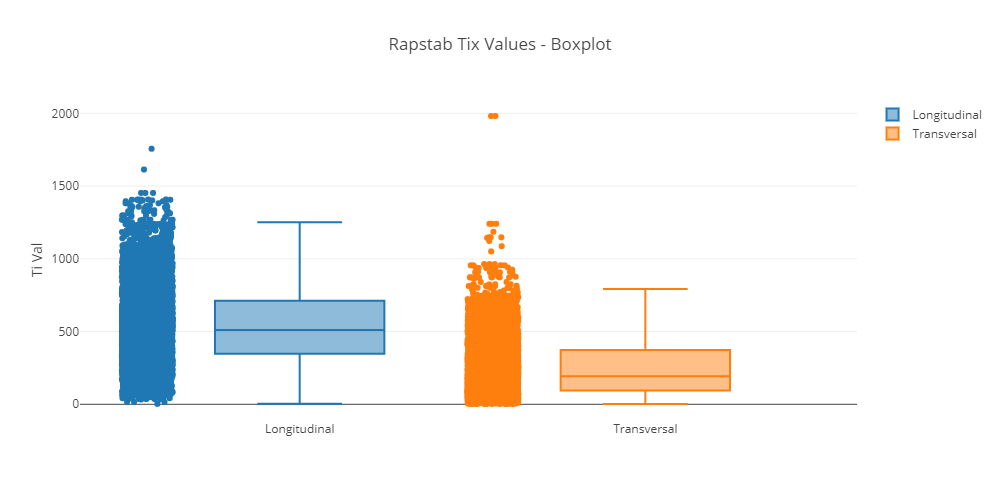

In [58]:
# plot til_val and tit_val as box plots

# .. prepare traces
trace_til_val = ply.graph_objs.Box(
    y=cleanedUspDf['RASPTAB_TIL_VAL'],
    name='Longitudinal',
    boxpoints='all',
    jitter=0.3,
    pointpos=-1.8
)

trace_tit_val = ply.graph_objs.Box(
    y=cleanedUspDf['RASPTAB_TIT_VAL'],
    name='Transversal',
    boxpoints='all',
    jitter=0.3,
    pointpos=-1.8
)

# .. set layout
mylayout = ply.graph_objs.Layout(
    title='Rapstab Tix Values - Boxplot',
    yaxis=dict(
        title='Ti Val'
    )
)

# .. set data to plot
traces = [trace_til_val, trace_tit_val]

# .. plot
graphFilename = outputDir + mylayout.title.text + ' - Box plot.html'
fig = ply.graph_objs.Figure(data=traces, layout=mylayout)

plot_figure(graphFilename, fig)

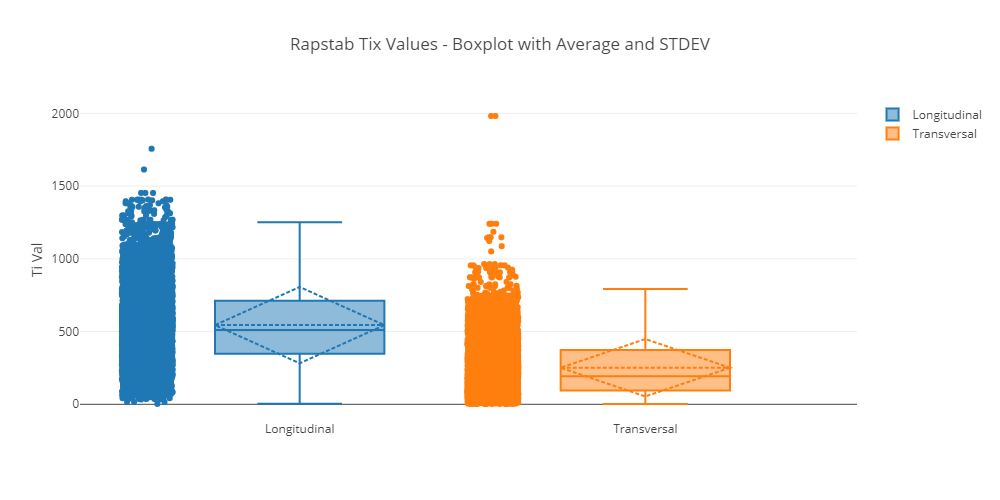

In [59]:
# plot til_val and tit_val as box plots - with average and stdev
# .. prepare traces
trace_til_val = ply.graph_objs.Box(
    y=cleanedUspDf['RASPTAB_TIL_VAL'],
    name='Longitudinal',
    boxpoints='all',
    boxmean='sd',
    jitter=0.3,
    pointpos=-1.8
)

trace_tit_val = ply.graph_objs.Box(
    y=cleanedUspDf['RASPTAB_TIT_VAL'],
    name='Transversal',
    boxpoints='all',
    boxmean='sd',
    jitter=0.3,
    pointpos=-1.8
)

# .. set layout
mylayout = ply.graph_objs.Layout(
    title='Rapstab Tix Values - Boxplot with Average and STDEV',
    yaxis=dict(
        title='Ti Val'
    )
)

# .. set data to plot
traces = [trace_til_val, trace_tit_val]

# .. plot
graphFilename = outputDir + mylayout.title.text + ' - Box plot + Mean and SD.html'
fig = ply.graph_objs.Figure(data=traces, layout=mylayout)
plot_figure(graphFilename, fig)

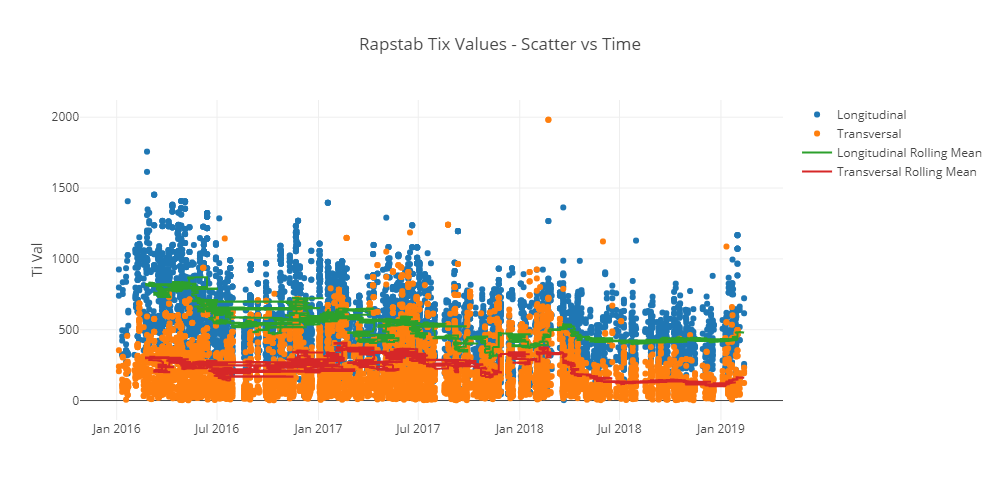

In [60]:
# plot til_val and tit_val vs time

# .. prepare traces
trace_til_val = ply.graph_objs.Scatter(
    x=cleanedUspDf['RASPTAB_SK_TEMPS'],
    y=cleanedUspDf['RASPTAB_TIL_VAL'],
    mode='markers',
    name='Longitudinal',
)

trace_tit_val = ply.graph_objs.Scatter(
    x=cleanedUspDf['RASPTAB_SK_TEMPS'],
    y=cleanedUspDf['RASPTAB_TIT_VAL'],
    mode='markers',
    name='Transversal',
)

# .. add a rolling mean to the tit_val data
trace_tit_val_fit = ply.graph_objs.Scatter(
    x=cleanedUspDf['RASPTAB_SK_TEMPS'],
    y=cleanedUspDf['RASPTAB_TIT_VAL'].rolling(200).mean(),
    mode='lines',
    name='Transversal Rolling Mean',
)


# .. add a rolling mean to the til_val data
trace_til_val_fit = ply.graph_objs.Scatter(
    x=cleanedUspDf['RASPTAB_SK_TEMPS'],
    y=cleanedUspDf['RASPTAB_TIL_VAL'].rolling(200).mean(),
    mode='lines',
    name='Longitudinal Rolling Mean',
)

# .. set layout
mylayout = ply.graph_objs.Layout(
    title='Rapstab Tix Values - Scatter vs Time',
    yaxis=dict(
        title='Ti Val'
    )
)

# .. set data to plot
traces = [trace_til_val, trace_tit_val, trace_til_val_fit, trace_tit_val_fit]

# .. plot
graphFilename = outputDir + mylayout.title.text + ' - Scatter vs Time.html'
fig = ply.graph_objs.Figure(data=traces, layout=mylayout)
plot_figure(graphFilename, fig)
#plot_figure(graphFilename, fig, GraphInteractionOption('interactive'))

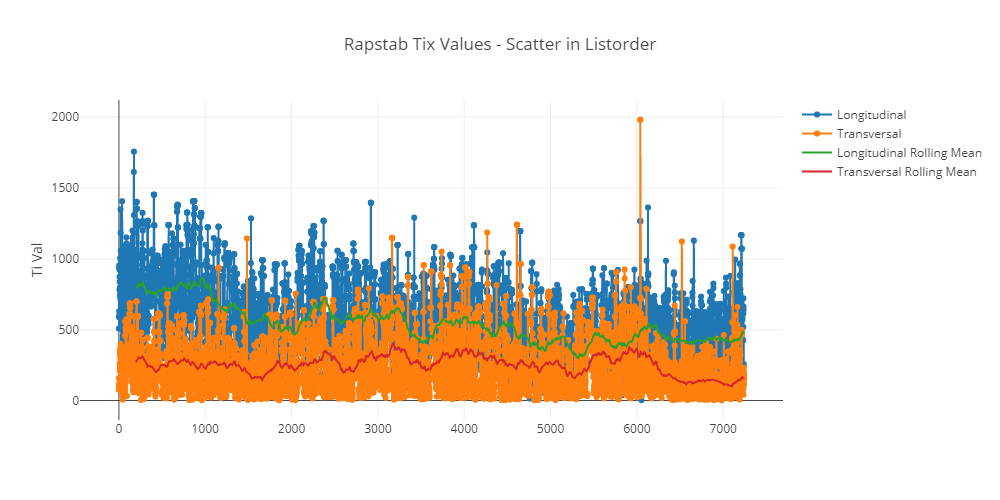

In [61]:
# plot til_val and tit_val in chronological order

# .. prepare traces
trace_til_val = ply.graph_objs.Scatter(
    x=cleanedUspDf.index,
    y=cleanedUspDf['RASPTAB_TIL_VAL'],
    mode='markers+lines',
    name='Longitudinal',
)

trace_tit_val = ply.graph_objs.Scatter(
    x=cleanedUspDf.index,
    y=cleanedUspDf['RASPTAB_TIT_VAL'],
    mode='markers+lines',
    name='Transversal',
)

# .. add a rolling mean to the tit_val data
trace_tit_val_fit = ply.graph_objs.Scatter(
    x=cleanedUspDf.index,
    y=cleanedUspDf['RASPTAB_TIT_VAL'].rolling(200).mean(),
    mode='lines',
    name='Transversal Rolling Mean',
)


# .. add a rolling mean to the til_val data
trace_til_val_fit = ply.graph_objs.Scatter(
    x=cleanedUspDf.index,
    y=cleanedUspDf['RASPTAB_TIL_VAL'].rolling(200).mean(),
    mode='lines',
    name='Longitudinal Rolling Mean',
)

# .. set layout
mylayout = ply.graph_objs.Layout(
    title='Rapstab Tix Values - Scatter in Listorder',
    yaxis=dict(
        title='Ti Val'
    )
)

# .. set data to plot
traces = [trace_til_val, trace_tit_val, trace_til_val_fit, trace_tit_val_fit]
 
# .. plot
graphFilename = outputDir + mylayout.title.text + ' - Scatter in chronological order.html'
fig = ply.graph_objs.Figure(data=traces, layout=mylayout)
plot_figure(graphFilename, fig)

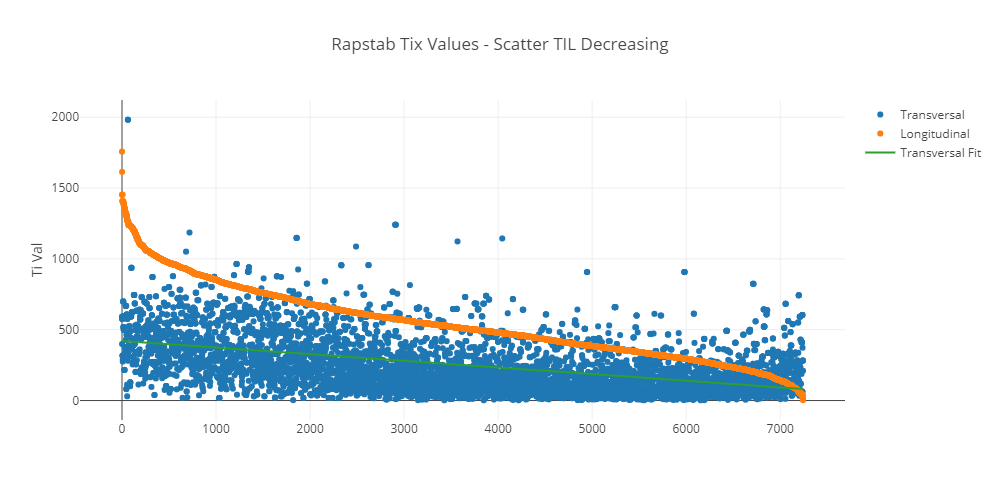

In [62]:
# plot til_val and tit_val with til_val in decreasing order

# .. make a copy of our source DF
tempRapstabDf = cleanedUspDf[['RASPTAB_TIL_VAL', 'RASPTAB_TIT_VAL']].copy()
tempRapstabDf = tempRapstabDf.sort_values(by='RASPTAB_TIL_VAL', ascending=False)
tempRapstabDf = tempRapstabDf.reset_index(drop=True)          # Don't forget to reset the index, (as sort shuffles it)

# .. prepare traces
trace_til_val = ply.graph_objs.Scatter(
    x=tempRapstabDf.index,
    y=tempRapstabDf['RASPTAB_TIL_VAL'],
    mode='markers',
    name='Longitudinal',
)

trace_tit_val = ply.graph_objs.Scatter(
    x=tempRapstabDf.index,
    y=tempRapstabDf['RASPTAB_TIT_VAL'],
    mode='markers',
    name='Transversal',
)

# .. add a linear fit to the tit_val data
m, b = np.polyfit(tempRapstabDf.index, tempRapstabDf['RASPTAB_TIT_VAL'], 1)
trace_tit_val_fit = ply.graph_objs.Scatter(
    x=tempRapstabDf.index,
    y=m * tempRapstabDf.index + b,
    mode='lines',
    name='Transversal Fit',
)

# .. set layout
mylayout = ply.graph_objs.Layout(
    title='Rapstab Tix Values - Scatter TIL Decreasing',
    yaxis=dict(
        title='Ti Val'
    )
)

# .. set data to plot
traces = [trace_tit_val, trace_til_val, trace_tit_val_fit]

# .. plot
graphFilename = outputDir + mylayout.title.text + ' - Scatter, til in decreasing order.html'
fig = ply.graph_objs.Figure(data=traces, layout=mylayout)
plot_figure(graphFilename, fig)

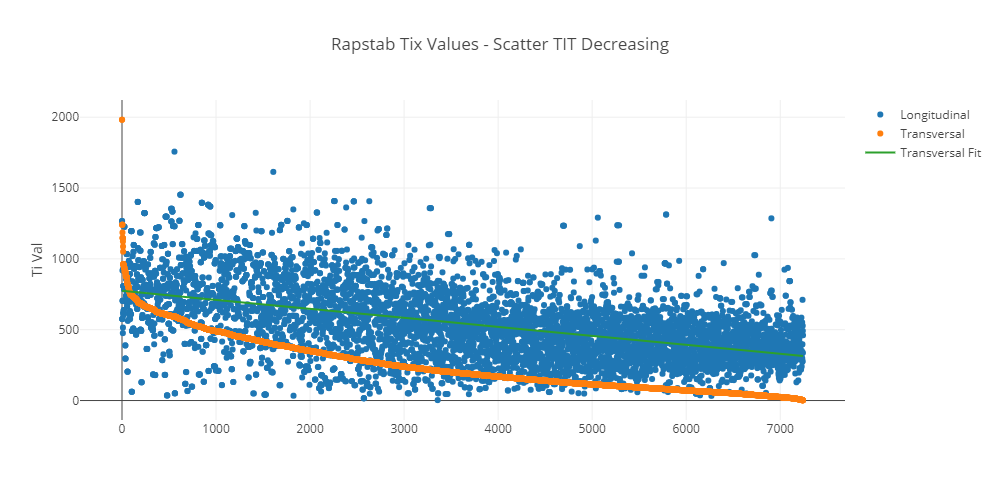

In [63]:
# plot til_val and tit_val with til_val in decreasing order

# .. make a copy of our source DF
tempRapstabDf = cleanedUspDf[['RASPTAB_TIL_VAL', 'RASPTAB_TIT_VAL']].copy()
tempRapstabDf = tempRapstabDf.sort_values(by='RASPTAB_TIT_VAL', ascending=False)
tempRapstabDf = tempRapstabDf.reset_index(drop=True)          # Don't forget to reset the index, (as sort shuffles it)

# .. prepare traces
trace_til_val = ply.graph_objs.Scatter(
    x=tempRapstabDf.index,
    y=tempRapstabDf['RASPTAB_TIL_VAL'],
    mode='markers',
    name='Longitudinal',
)

trace_tit_val = ply.graph_objs.Scatter(
    x=tempRapstabDf.index,
    y=tempRapstabDf['RASPTAB_TIT_VAL'],
    mode='markers',
    name='Transversal',
)

# .. add a linear fit to the tit_val data
m, b = np.polyfit(tempRapstabDf.index, tempRapstabDf['RASPTAB_TIL_VAL'], 1)
trace_tit_val_fit = ply.graph_objs.Scatter(
    x=tempRapstabDf.index,
    y=m * tempRapstabDf.index + b,
    mode='lines',
    name='Transversal Fit',
)

# .. set layout
mylayout = ply.graph_objs.Layout(
    title='Rapstab Tix Values - Scatter TIT Decreasing',
    yaxis=dict(
        title='Ti Val'
    )
)

# .. set data to plot
traces = [trace_til_val, trace_tit_val, trace_tit_val_fit]

# .. plot
graphFilename = outputDir + mylayout.title.text + ' - Scatter, tit in decreasing order.html'
fig = ply.graph_objs.Figure(data=traces, layout=mylayout)
plot_figure(graphFilename, fig)

## Save cleaned Dataset

In [64]:
filepath = os.path.join(outputDir, os.path.splitext(uspExcelExportFileName)[0] + "_cleaned.csv")
cleanedUspDf.to_csv(filepath)